# Chapter 2: End-to-End Machine Learning Project

### Download the data

In [2]:
import os
import tarfile
import urllib

HOUSING_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
HOUSING_PATH = "datasets"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    os.remove(os.path.join(housing_path, "housing.tgz"))

In [3]:
fetch_housing_data()

Load the data as a pandas dataframe:

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### Take a quick look at the data structure

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Get a quick description of the data including total # of rows, attribute types and # of non-null values

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Display all the unique values for ocean_proximity field and # of rows with that value:

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Use describe to get basic info about numerical values

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Use a histogram to get a feel for your data:

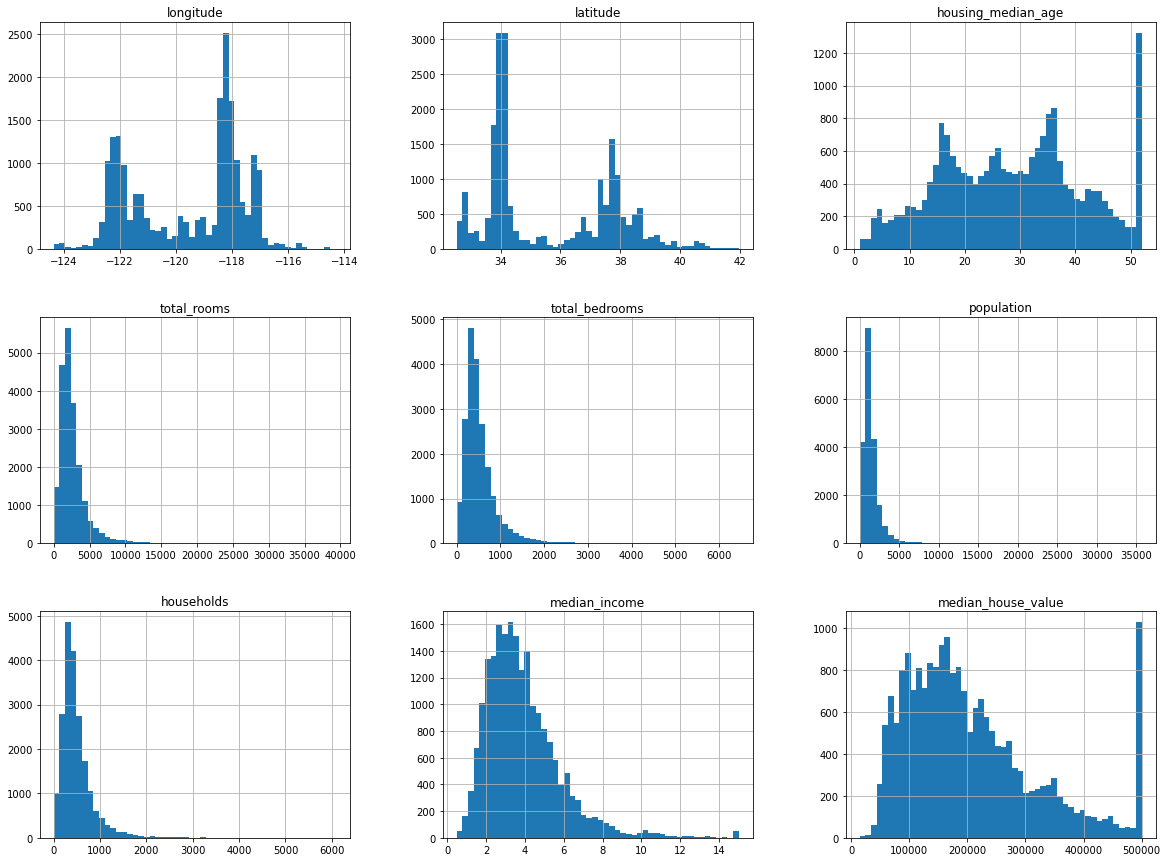

In [9]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

Takeways:
* Meadian income not in USD, scaled and capped 0.5-15, approx 10s of thousands
* Housing median age and median value are also capped. Meadian value being capped may be an issue because this is what we are trying to predict. 
* Attribute scales are diferent. May need to explore feature scaling.
* Many histograms are tail-heavy (extend far to the right of median than left). May have to try to transform into more bell-shaped curves

### Create a test set

A naive implementation of splitting data set into train and test sets. Note that on every run this will produce different data due to use of random. To keep this consistent, we can set random generation seed. 

In [10]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.default_rng(42).permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.2)

In [12]:
len(train_set)

16512

In [13]:
len(test_set)

4128

In [14]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18731,-122.41,40.55,19.0,3753.0,761.0,1952.0,738.0,3.0954,86500.0,INLAND
3002,-119.01,35.32,23.0,4870.0,965.0,2717.0,928.0,2.5960,70000.0,INLAND
19844,-119.09,36.42,17.0,877.0,219.0,966.0,218.0,2.0000,52500.0,INLAND
4939,-118.27,33.99,30.0,504.0,140.0,529.0,123.0,1.9531,100000.0,<1H OCEAN
1674,-122.27,38.04,47.0,1685.0,405.0,835.0,372.0,2.3103,134500.0,NEAR BAY


Setting the random seed helps as long as our data set doesn't change. But if we get additional data, this will also break. 


Possible solution: 
* Use each instance's identifier to decide whether or not it should go in the test set (assuming each row has a unique and immutable identifier)
    * Hash each row's ID, if ID hash is < 20% * max hash, put row in test set
    * If new data is added, old data's hashes will not change, 20% of new data will go in test set and 20% will go in train

In [15]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    hash_val = crc32(np.int64(identifier)) & 0xffffffff # & 0xffffffff to ensure resulting value is always unsigned if using Python 2, function changed in Python 3.0 to be always unsigned
    return hash_val < test_ratio * 2**32 # 2^32 is the maximum hash value

def split_train_test_by_id(data, test_ratio, id_col):
    ids = data[id_col]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Housing data does not have a unique, immutable identifier on each row, so we can add a row index. 

One caveat for using a row index, need to ensure new data is appended to the end and no rows ever get deleted. 

In [16]:
housing_with_id = housing.reset_index() # adds an index column
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
train_set_hash, test_set_hash = split_train_test_by_id(housing_with_id, 0.2, "index")
train_set_hash.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


If we cannot ensure new data is appended to the end and no rows ever get deleted, we could try to use the most stable feature(s) to build a unique identifier. With housing, this could be latitude/longitude. 

In [18]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_latlong_set, test_latlong_set = split_train_test_by_id(housing_with_id, 0.2, "id")
train_latlong_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


Using train_test_split function from Scikit-Learn, does essentially the same thing as our split_train_test method. Randomly divides up input data into specified percentage train/test. 

In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))
train_set.head()

16512
4128


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


If median income is an especially important attribute and we want to ensure the test set is representative of the various categories of incomes from the whole dataset, we could use stratified sampling. 
* Data set is divided into homogeneous subgroups called _strata_, the correct number of instances are sampled from each stratum to ensure the test set is representative of overall dataset

Median income is currently a numerical attribute so we need to create an income categorical attribute. 
* Use histogram to see distribution of values (clustered around 1.5-6, some way beyond 6)
* You want a sufficient number of instances in your dataset for each stratum, otherwise the estimate of a stratum's importance may be biased. 
* Should not have too many strata, each stratum should be large enough. 

In [20]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1,2,3,4,5])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [21]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

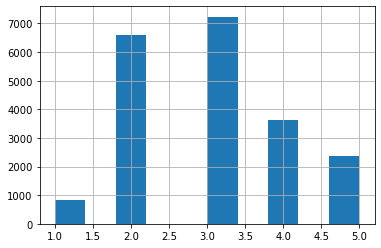

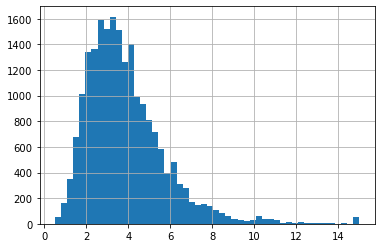

In [22]:
housing["income_cat"].hist()
plt.show()
housing["median_income"].hist(bins=50)
plt.show()

We can use ScikitLearn to get a stratified sampling of our data. We can compare the distribution of the income categories for the stratified sampling, the overall dataset and then from a random sampling. We can see the random sampling doesn't accurately reflect the distribution in the dataset. 

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [25]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [26]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set["income_cat"].value_counts() / len(housing)

3    0.278876
2    0.253973
4    0.142829
5    0.092539
1    0.031783
Name: income_cat, dtype: float64

Or a prettier chart:

In [27]:

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


We can now drop the categorical attribute now that we have an even distribution of our test set. 

In [28]:
for set_ in (strat_train_set, strat_test_set): 
    set_.drop("income_cat", axis=1, inplace=True)

### Visualizing Geographical Data

Create a copy of the training set for visualization so we don't mess up our training set. 

In [29]:
housing = strat_train_set.copy()

Data includes geographical information (lat/long), use a scatter plot to visualize

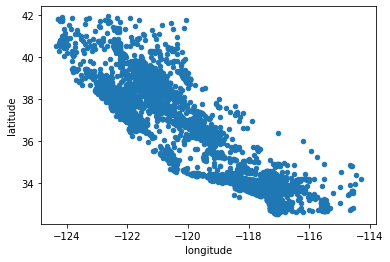

In [30]:
housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

Set the alpha property to visualize the density of the data:

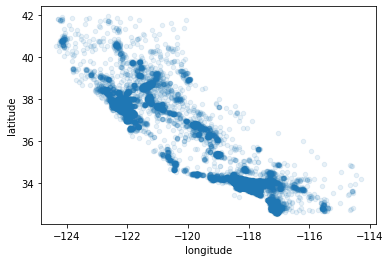

In [31]:
housing.plot(kind='scatter', x='longitude', y ='latitude', alpha=0.1)
plt.show()

Add cities for context: 

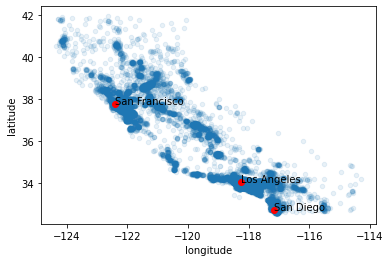

In [32]:
housing.plot(kind='scatter', x='longitude', y ='latitude', alpha=0.1)
plt.plot(-117.1611, 32.715, 'ro')
plt.text(-117.1611, 32.715, 'San Diego')
plt.plot(-118.2437, 34.0522, 'ro')
plt.text(-118.2437, 34.0522, 'Los Angeles')
plt.plot(-122.4194, 37.7749, 'ro')
plt.text(-122.41947, 37.7749, 'San Francisco')
plt.show()

Plot the data and use color to indicate housing prices and size of dot to indicate population:

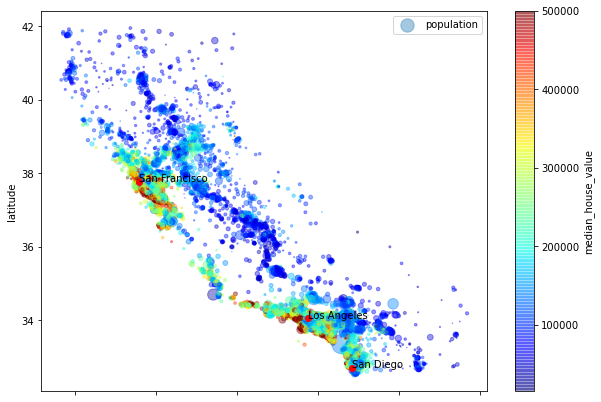

In [33]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100, label='population', figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.plot(-117.1611, 32.715, 'ro')
plt.text(-117.1611, 32.715, 'San Diego')
plt.plot(-118.2437, 34.0522, 'ro')
plt.text(-118.2437, 34.0522, 'Los Angeles')
plt.plot(-122.4194, 37.7749, 'ro')
plt.text(-122.41947, 37.7749, 'San Francisco')
plt.show()

From this plot we can learn that housing prices are strongly correlated to proximity of the ocean and population density. We can tell this because as the lat/long gets closer to the ocean, we see more yellow/red colors. Also, in the areas where the dots are larger, prices are higher. 

### Look for correlations

We can compute the standard correlation coefficient (Pearson's r) between every pair of attributes to try to find correlations:

In [34]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [35]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Values close to 1 or -1 indicate a strong correlation between that attribute and what we are trying to predict (the median_house_value). Close to 1 indicates a strong positive correlation, close to -1 indicates a strong negative correlation. Close to zero indicates no linear correlation. Correlation coefficient only measures linear correlations.

We can also use a scatter matrix to check for correlations:

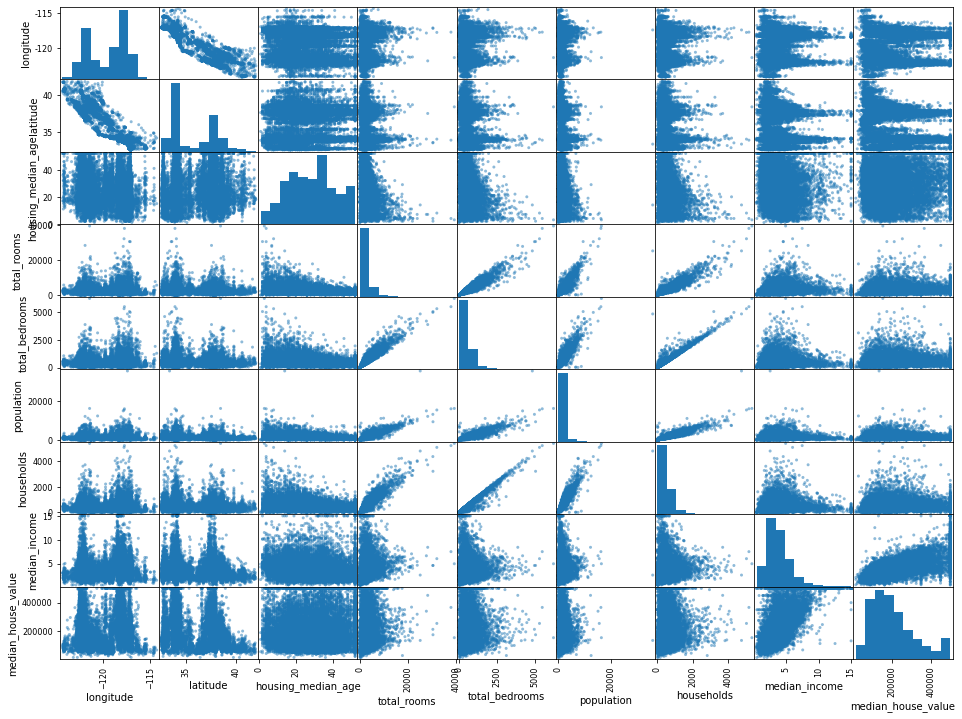

In [36]:
from pandas.plotting import scatter_matrix

scatter_matrix(housing, figsize=(16, 12))
plt.show()

We can focus this plot on a few promising attributes:

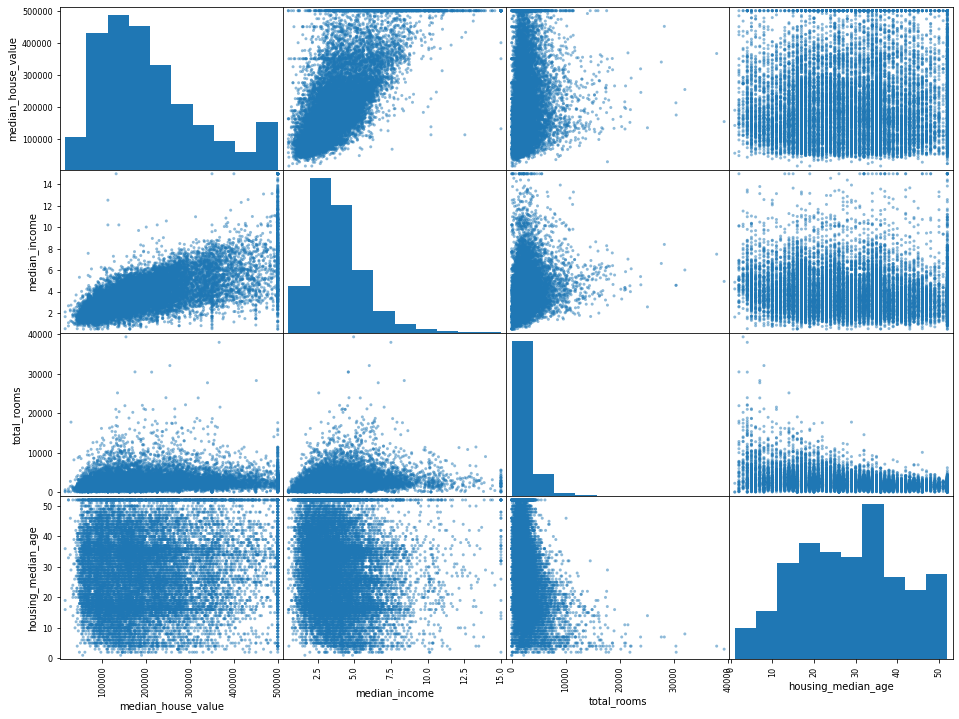

In [37]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(16,12))
plt.show()

Note that the diagonal would be full of straight lines which wouldn't be very useful so by default pandas plots a histogram of the values for that attribute instead. We can use these plots to look for linear correlations or possibly other types of correlations. median_income looks the most promising so we can zoom in:

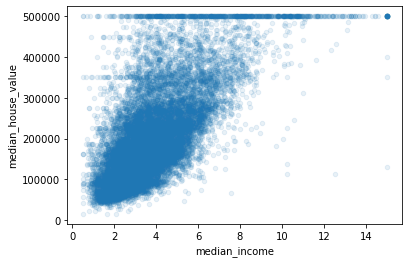

In [38]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.show()

We can clearly see the price cap at 500,000 as a horizontal line. We can also see horizontal lines at 450k and 350k and around 280k. We may need to try removing these districts to prevent our algorithm from picking up on these anomalies. 

From our plotting we have learned a few ways to explore data and gain insights. We identified a few data quirks we may need to clean up before feed our data into an ML algorithm. We found interesting correlations between attributes and we noticed some attributes have tail-heavy distributions. We may need to transform these (by computing their logarithm or something else). 

We may also want to try creating some new attributes from our data. For example, total # of rooms in a district isn't very useful on it's own, we'd rather know the avg. # of rooms per household. 

In [39]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [40]:
corr_matrix= housing.corr()

In [41]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

We can see that bedrooms_per_room has a much stronger correlation than total_bedrooms or total_rooms. This stage of the process doesn't need to be absolutely thorough but we should try to gain some quick insights to get us started in the right direction. We can come back to this step and iterate. 

### Prepare the Data for ML Algorithms

We should write functions to perform various transformations to our data so we can perform the transformations again on fresh data/in our live system and compose various transformations to find the best combinations. 

Revert to a clean training set and separate out the predictors from the labels. We may not want to apply the same transformation to both the predictors and the labels.

In [80]:
housing = strat_train_set.drop(columns = 'median_house_value') # drop creates a copy, doesn't modify the original
housing_labels = strat_train_set['median_house_value'].copy()

In [43]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [44]:
housing_labels.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

Most ML algorithms can't work on missing features. We saw earlier that total_bedrooms was missing for some values so to fix we can 

1. Get rid of the rows `dropna()` 
1. Get rid of the attribute `drop()`
1. Set the values to some value (zero, mean, median, etc) `fillna()`

In [45]:
housing.dropna(subset=['total_bedrooms']) # option 1, get rid of all rows where this attribute is null
housing.drop('total_bedrooms', axis=1) # option 2, delete the column
median = housing['total_bedrooms'].median() # option 3, compute median
housing['total_bedrooms'].fillna(median, inplace=True)

If we choose option 3 we can use ScikitLearn's SimpleImputer to calculate the mean of various attributes:

In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
housing_num = housing.drop(columns='ocean_proximity') # imputer only works on numerical attributes, drop the categorical
imputer.fit(housing_num)
print(imputer.statistics_)
print(housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


It is good to compute the median for all values in the training set when building the model if we are using the fillna strategy. We cannot be sure what values may be missing when system goes live. 

In [47]:
X = imputer.transform(housing_num) # returns a plain numPy array
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index=housing_num.index) # put back in Pandas DF
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


### Handling Text and Categorical Attributes

In [48]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


There are a limited number of possible values for this attribute so it is a categorical attribute (as opposed to free text). ML algorithms prefer numbers so convert text to numbers using Scikit-Learn's OrdinalEncoder

In [49]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [50]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this strategy is that ML algorithms will interpret closer together numerical values as more similar than two distant values. This may be okay for some categories (i.e. "bad", "average", "good") but not here since there isn't a clear progression from close to further from ocean. We can solve this problem with "One-hot encoding". This is the process of removing the categorical column creating new columns for each category and putting a 1 in the column if that category applies and a 0 otherwise. Only 1 of the new "dummy" columns will have a 1 in it per row. 

In [51]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [52]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

If a categorical attribute has a large number of attributes, one-hot encoding will result in a large number of input features. This may slow down or degrade performance for training ML algorithms. If we run into this we may want to replace the categorical attribute with a useful numerical attribute like distance to ocean. 

We can write custom transformers that will work with Scikit-Learn pipelines using duck-typing (as opposed to inheritance). We just have to create a class that implements 3 methods: fit(), transform() and fit_transform(). We can add TransformerMixin to get fit_transform() for free. We can add BaseEstimator as a base class and get get_params() and set_params() for free as well which are useful for automatic hyper-parameter turning. 

Fitting finds the internal parameters of a model that will be used to transform data. Transforming applies the parameters to data.

We will write a custom transformer to add the combined attributes we discussed earlier. 

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Min-max scaling (normalization): re-scaling values so they range from zero to 1. Subtract the min value and divide by max minus min. Can use Scikit-Learn's MinMaxScaler for this. 


$\frac{x - min}{max-min}$

Standardization: subtract the mean then divide by the standard deviation. The resulting distribution has unit variance. Standardized values always have a mean of zero. This doesn't bound values to a specific range like min-max scaling but it is much less affected by outliers. Can use Scikit-Learn's StandardScaler. 

Note: as with all transformations, only fit the scalers to the training data, not the full data set or test data. 

We can use Scikit-Learn's Pipeline to apply transformations in a specific order.

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

The above pipeline only handled the numerical data. If we want to handle categorical data in the same pipeline, we can use a ColumnTransformer. 

In [78]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train a Model

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [57]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [58]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse 

68628.19819848923

RMSE of 68k is not great, since median_housing_values range from 120k to 265k. This is an example of underfitting. When this happens it can mean that features do not provide enough info to make good predictions or that the model is not powerful enough. Ways to fix underfitting: pick a more powerful model, use better features, reduce constrains on the model. 

Let's try a more powerful model. We will use a Decision Tree Regression. It is a powerful model capable of finding non-linear relationships in data. 

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_mse = np.sqrt(tree_mse)
tree_mse

0.0

0 error means the model likely overfit the data. Need to test against new data to be sure, but don't want to touch the test set until we are ready to launch our model, as this could bias our model selection causing us to overfit the test data. 

We can use cross-validation. This randomly splits the training set into 10 distinct subsets called folds, then trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. 

In [60]:
from sklearn.model_selection import cross_val_score

# uses a utility function (greater is better), as opposed to a cost function (lower is better)
# so we use neg_mean_squared_error and take -scores
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [61]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [62]:
display_scores(tree_rmse_scores)

Scores: [68406.40560121 68048.31180768 71440.66987681 67729.81122226
 71527.02802287 75250.64430932 70533.39445891 71823.3064348
 76562.94391165 69516.13359386]
Mean: 71083.86492393701
Standard deviation: 2804.401552757114


Cross validation provides additional benefit of seeing how precise our estimate of error is since we have 10 average errors from 10 different training sets. We can see our mean error is 70,889.63 += 2158.38. Cross-validation comes at the cost of training a model multiple times. 

We can also use cross-validation on our linear regression model:

In [63]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
display_scores(np.sqrt(-lin_scores))

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798346


It turns out that the overfitting of the decision tree is so bad that it performs worse than linear regression! Let's try a random forest. A random forest works by training many decision trees on random subsets of the features, then averaging out their predictions. 

In [64]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
print(np.sqrt(forest_mse))

18674.022424188846


In [65]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

In [66]:
display_scores(np.sqrt(-forest_scores))

Scores: [49532.91816056 47410.44104995 50046.02330122 52624.78131589
 49507.78043069 53344.99137756 48908.44600969 47866.87820026
 53124.26148723 49933.5766413 ]
Mean: 50230.00979743483
Standard deviation: 2005.6145961212746


Random forests are looking promising but note that the score on the training set is still much lower than on the validation sets which tells us that the model is still overfitting the training set. Possible solutions for overfitting are to simplify the model, constrain/regularize it or get a lot more training data. 

Normally we would try out several different models from various categories of ML algorithms without spending too much time tweaking hyperparameters with the goal of shortlisting 2-5 promising candidates.

You should save every model you experiment with so you can easily come back later to any model you want. Save both the hyperparameters and the trained parameters, as well as the cross-validation scores and perhaps the actual predictions as well. This way we can easily compare scores across model types and compare the types of errors they make. 

You an use Scikit-Learn models using the pickle or joblib library.

In [67]:
import joblib

joblib.dump(forest_reg, 'forest_reg.pkl')

['forest_reg.pkl']

## Fine-tune Your Model

Assuming you have a shortlist of models, you now need to fine tune them. 

You could manually fiddle with the hyperparameters until you find the best combination but this would be very tedious and time-consuming. 

You can use Scikit-Learn's GridSearchCV to do this for you. Tell it which hyperparameters you want to experiment with and what values to try out. It will use cross-validation to evaluate all the possible combinations of hyperparameters. 

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Tip: if you have no idea what hypterparameter values should be, try out consecutive powers of 10 or some other number to get a range you can narrow down.

This param_grid tells Scikit-Learn to first evaluate all 3x4=12 combinations of n_estimators and max_features from the first dict, then try all 2x3=6 combinations in the second dict. It checks 18 combinations of hyperparameters total and it will train each model 5 times using five-fold cross-validation. In total, there will be 18x5=90 rounds of training. 

In [72]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [73]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64774.87036829117 {'max_features': 2, 'n_estimators': 3}
55496.44703084686 {'max_features': 2, 'n_estimators': 10}
52805.71821928945 {'max_features': 2, 'n_estimators': 30}
59947.770845553314 {'max_features': 4, 'n_estimators': 3}
52645.03636677223 {'max_features': 4, 'n_estimators': 10}
50559.257949256134 {'max_features': 4, 'n_estimators': 30}
59174.227902423816 {'max_features': 6, 'n_estimators': 3}
52038.774050822445 {'max_features': 6, 'n_estimators': 10}
49991.73797986644 {'max_features': 6, 'n_estimators': 30}
58485.83952947 {'max_features': 8, 'n_estimators': 3}
52171.12338648112 {'max_features': 8, 'n_estimators': 10}
50008.81266089116 {'max_features': 8, 'n_estimators': 30}
62605.58685859129 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54845.4489246433 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59733.60252135285 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52278.056432159545 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [118]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

model_params = {
    'n_estimators': randint(30,40),
    'max_features': randint(6,12)
}

rand_search = RandomizedSearchCV(forest_reg, model_params, scoring='neg_mean_squared_error', return_train_score=True, n_iter=20)

rand_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f81e8a60bb0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f81e8afa700>},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [119]:
rand_search.best_params_

{'max_features': 6, 'n_estimators': 33}

In [120]:
cvres = rand_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50147.30896331557 {'max_features': 6, 'n_estimators': 34}
49990.82129466016 {'max_features': 7, 'n_estimators': 32}
49936.024233099226 {'max_features': 9, 'n_estimators': 30}
49943.13736818716 {'max_features': 8, 'n_estimators': 33}
49733.57148727159 {'max_features': 7, 'n_estimators': 37}
50348.77894429971 {'max_features': 10, 'n_estimators': 31}
49904.69960130125 {'max_features': 9, 'n_estimators': 38}
50123.46077394639 {'max_features': 8, 'n_estimators': 32}
49874.956760837544 {'max_features': 10, 'n_estimators': 39}
50279.27480469406 {'max_features': 11, 'n_estimators': 37}
49892.0883860455 {'max_features': 9, 'n_estimators': 31}
50400.68582621923 {'max_features': 11, 'n_estimators': 33}
49692.25438922131 {'max_features': 8, 'n_estimators': 39}
49754.521158119765 {'max_features': 7, 'n_estimators': 39}
49735.41251845794 {'max_features': 6, 'n_estimators': 33}
49944.9909510991 {'max_features': 9, 'n_estimators': 38}
49822.71048821008 {'max_features': 9, 'n_estimators': 39}
49605.792

In [97]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.19760992e-02, 6.66911978e-02, 4.08906514e-02, 1.83232100e-02,
       1.75472468e-02, 1.80697783e-02, 1.64948439e-02, 3.30897466e-01,
       6.11286643e-02, 1.11241947e-01, 7.88741746e-02, 1.28215057e-02,
       1.47674272e-01, 3.98543615e-05, 2.83529060e-03, 4.49379787e-03])

In [98]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3308974660093581, 'median_income'),
 (0.14767427212337944, 'INLAND'),
 (0.11124194696313282, 'pop_per_hhold'),
 (0.07887417462414441, 'bedrooms_per_room'),
 (0.07197609920659191, 'longitude'),
 (0.06669119781940332, 'latitude'),
 (0.061128664268506556, 'rooms_per_hhold'),
 (0.04089065140068829, 'housing_median_age'),
 (0.01832320999754825, 'total_rooms'),
 (0.018069778287605285, 'population'),
 (0.017547246839261402, 'total_bedrooms'),
 (0.01649484391048073, 'households'),
 (0.012821505723941407, '<1H OCEAN'),
 (0.00449379786520886, 'NEAR OCEAN'),
 (0.0028352905992936875, 'NEAR BAY'),
 (3.9854361455524516e-05, 'ISLAND')]

### Evaluate Your System on the Test Set

In [121]:
final_model_grid = grid_search.best_estimator_
final_model_rand = rand_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared_grid = full_pipeline.transform(X_test)
X_test_prepared_rand = full_pipeline.transform(X_test)

final_predictions_grid = final_model_grid.predict(X_test_prepared_grid)
final_predictions_rand = final_model_rand.predict(X_test_prepared_rand)

final_mse_grid = mean_squared_error(y_test, final_predictions_grid)
final_mse_rand = mean_squared_error(y_test, final_predictions_rand)

final_rmse_grid = np.sqrt(final_mse_grid)   # => evaluates to 47,730.2
final_rmse_rand = np.sqrt(final_mse_rand)   # => evaluates to 47,730.2

print(final_rmse_grid)
print(final_rmse_rand)

48492.645572012916
47605.07440615789


In [122]:
from scipy import stats
confidence = 0.95
squared_errors_grid = (final_predictions_grid - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors_grid) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors_grid)))

array([46460.43552141, 50443.04987119])

In [123]:
squared_errors_rand = (final_predictions_rand - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors_rand) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors_rand)))

array([46567.64321894, 50344.09552449])